### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [15]:
#full_data = all data and sample_data == 200 samples
sample_diff = []
sample_coff = []
sample_noncoff = []
for n in range(10000):
    bootstrap = sample_data.sample(200, replace=True)
    boot_coff = bootstrap[bootstrap['drinks_coffee'] == True]['height'].mean()
    boot_no = bootstrap[bootstrap['drinks_coffee'] == False]['height'].mean()
    sample_coff.append(boot_coff)
    sample_noncoff.append(boot_no)
    sample_diff.append((boot_coff - boot_no))

In [16]:
sample_diff = np.array(sample_diff)
sample_coff = np.array(sample_coff)
sample_nocoff = np.array(sample_noncoff)
print('No coff mean: {}'.format(sample_nocoff.mean()))
print('No coff standard deviation: {}'.format(sample_nocoff.std()))
print('No coff variance: {}'.format(sample_nocoff.var()))

No coff mean: 66.78956720312536
No coff standard deviation: 0.40506532293054454
No coff variance: 0.16407791584082632


In [17]:
print('coff mean: {}'.format(sample_coff.mean()))
print('coff standard deviation: {}'.format(sample_coff.std()))
print('coff variance: {}'.format(sample_coff.var()))
print('diff mean: {}'.format(sample_diff.mean()))
print('diff standard deviation: {}'.format(sample_diff.std()))
print('diff variance: {}'.format(sample_diff.var()))

coff mean: 68.12052816885529
coff standard deviation: 0.24376254576428988
coff variance: 0.05942017871748751
diff mean: 1.3309609657299497
diff standard deviation: 0.4695920477595053
diff variance: 0.2205166913189655


`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [18]:
nulls = np.random.normal(0,np.std(sample_diff), 10000)

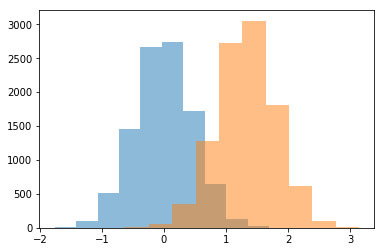

In [23]:
plt.hist(nulls, alpha=0.5);
plt.hist(sample_diff, alpha=0.5);

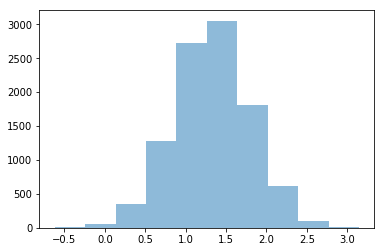